## MOOC Econometrics Case Project – House Prices

### Introduction

This project studies how different house characteristics affect the selling price of houses. The dataset contains information on 546 houses, including price, lot size, number of bedrooms and bathrooms, structural features (such as garage and air conditioning), and neighborhood type.

The main goal is to build a statistical model that explains house prices and predicts them accurately. To do this, we use regression analysis, apply log transformations where necessary, test whether the model is correctly specified, and evaluate how well the final model predicts new data.

### Objectives

The main objectives of this project are:

- To understand how house features influence the sale price.
- To check whether a simple linear regression model is appropriate using the RESET test.
- To determine whether lot size should be used in its original form or in logarithmic form.
- To examine whether the effect of lot size changes when combined with other variables (interaction effects).
- To improve the model step by step using the general-to-specific method.
- To discuss possible bias caused by missing variables, such as the overall condition of the house.
- To test how well the final model predicts house prices using out-of-sample data.

### Methodology

The analysis was carried out in a clear and organized way:

#### Data Preparation

The dataset includes 546 observations with variables such as sale price, lot size, bedrooms, bathrooms, garage spaces, and neighborhood indicator.

**New variables were created:**

- `log_sell`: the logarithm of sale price
- `log_lot`: the logarithm of lot size

**Log transformation was used to:**

- Reduce skewness in prices
- Stabilize variance
- Improve the linear relationship between variables

#### Model Estimation

- First, a simple linear regression model was estimated with sale price as the dependent variable.
- Then, a log-linear model was estimated using the log of sale price.
- Both lot size and log(lot size) were included together in one model to determine which form explains house prices better.
- Model performance was compared using statistical significance and goodness-of-fit measures.

#### Model Diagnostics

- To ensure the model is correctly specified:
  - The RESET test was applied to check for functional form problems (non-linearity).
  - Individual significance of variables was checked using t-tests.
  - Overall model significance was tested using the F-test.
  - The goodness of fit was evaluated using R-squared and Adjusted R-squared.

#### Interaction Effects

- Interaction terms were created between `log_lot` and other explanatory variables.
- These interaction terms help determine whether the effect of lot size changes depending on other house features.
- Each interaction was tested individually using t-tests.
- A joint F-test was conducted to check whether all interaction terms are significant together.

#### Model Selection

- A general-to-specific approach was used.
- Starting with the full model (including all interaction terms), non-significant interaction terms were removed step by step.
- Only interaction terms were removed — main variables were kept in the model.
- The final model includes only statistically significant interaction effects.

#### Predictive Analysis

- To evaluate predictive power:
  - The dataset was divided into:
    - Training set (first 400 observations)
    - Test set (remaining 146 observations)
  - The model was estimated using the training data.
  - Predictions were made for the test data.
  - Predictive accuracy was measured using Mean Absolute Error (MAE).
  - MAE was compared to the standard deviation of log sale prices to evaluate how good the predictions are relative to natural variation in prices.

#### Consideration of Endogeneity

- Some important variables, such as the overall condition of the house, were not included in the dataset.
- If house condition affects both price and features like central air conditioning, this may create omitted variable bias.
- As a result, the effect of variables like central air may be overestimated or underestimated.
- This issue highlights the importance of careful interpretation of regression results.

In [3]:
# CAPSTONE PROJECT: HOUSE PRICE ANALYSIS

# Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

file_path = r"E:\project.csv"   # Change path if needed
df = pd.read_csv(file_path)

print(df.head())
print(df.describe())

   obs   sell   lot  bdms  fb  sty  drv  rec  ffin  ghw  ca  gar  reg
0    1  42000  5850     3   1    2    1    0     1    0   0    1    0
1    2  38500  4000     2   1    1    1    0     0    0   0    0    0
2    3  49500  3060     3   1    1    1    0     0    0   0    0    0
3    4  60500  6650     3   1    2    1    1     0    0   0    0    0
4    5  61000  6360     2   1    1    1    0     0    0   0    0    0
              obs           sell           lot        bdms          fb  \
count  546.000000     546.000000    546.000000  546.000000  546.000000   
mean   273.500000   68121.597070   5150.265568    2.965201    1.285714   
std    157.760895   26702.670926   2168.158725    0.737388    0.502158   
min      1.000000   25000.000000   1650.000000    1.000000    1.000000   
25%    137.250000   49125.000000   3600.000000    2.000000    1.000000   
50%    273.500000   62000.000000   4600.000000    3.000000    1.000000   
75%    409.750000   82000.000000   6360.000000    3.000000    

### Findings

#### (a) OLS Regression – Level Model

The initial Ordinary Least Squares (OLS) regression was estimated using house sale price (`sell`) as the dependent variable. The model explained 67.3% of the variation in house prices (R² = 0.673), indicating a moderately strong fit.

##### Key findings:

**Significant variables (p < 0.05):**

- Lot size (`lot`): coefficient = 3.546, t = 10.124  
- Full bathrooms (`fb`): coefficient = 14,340, t = 9.622  
- Stories (`sty`): coefficient = 6,557, t = 7.086  
- Driveway (`drv`): coefficient = 6,688, t = 3.270  
- Recreational room (`rec`): coefficient = 4,511, t = 2.374  
- Finished basement (`ffin`): coefficient = 5,452, t = 3.433  
- Gas heating (`ghw`): coefficient = 12,830, t = 3.988  
- Central air conditioning (`ca`): coefficient = 12,630, t = 8.124  
- Garage spaces (`gar`): coefficient = 4,245, t = 5.050  
- Preferred neighborhood (`reg`): coefficient = 9,370, t = 5.614  

**Non-significant variables:**

- Bedrooms (`bdms`): p = 0.081  
- Constant term: p = 0.237  

**Diagnostics and issues:**

- RESET test p-value = 2.92e-07 → rejects linearity assumption.  
- Residual plots indicate heteroscedasticity and non-linear patterns.  
- Condition number (3.07 × 10⁴) is large, suggesting potential multicollinearity or numerical instability.  

**Conclusion:**  
Although several variables are significant, the model violates the linearity assumption, making it unsuitable for reliable interpretation without transformation.

In [4]:
# Linear model: sell ~ all other variables
y = df['sell']
X = df.drop(columns=['sell', 'obs'])
X = sm.add_constant(X)

model_a = sm.OLS(y, X).fit()
print(model_a.summary())

# Linear RESET Test
reset_test_a = linear_reset(model_a, power=2, use_f=True)
print("RESET Test (Level Model)")
print("F-statistic:", reset_test_a.fvalue)
print("p-value:", reset_test_a.pvalue)
if reset_test_a.pvalue < 0.05:
    print("Reject H0 → Model is NOT linear at 5% level.")
else:
    print("Fail to reject H0 → Model is linear at 5% level.")

                            OLS Regression Results                            
Dep. Variable:                   sell   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Thu, 26 Feb 2026   Prob (F-statistic):          6.18e-122
Time:                        07:42:20   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4038.3504   3409.471     -1.184      0.2

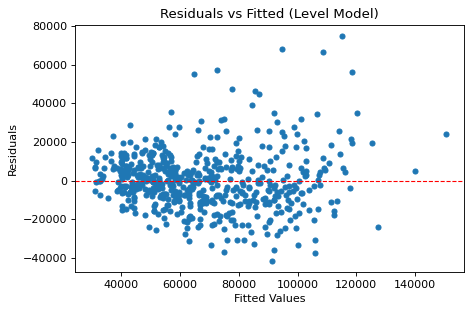

In [5]:
plt.figure(figsize=(6, 4), dpi=80)  # smaller size
plt.scatter(model_a.fittedvalues, model_a.resid, s=20)  # s=20 reduces marker size
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Level Model)")
plt.tight_layout()  # prevents clipping of labels
plt.show()

#### (b) Log-Transformed Sale Price Model

To address non-linearity and heteroscedasticity, the dependent variable was transformed using the natural logarithm:

log_sell = log(sell)

This log transformation stabilizes variance, reduces skewness, and allows the coefficients to be interpreted as approximate percentage changes.

##### Key results:

- Model fit improved slightly: R² = 0.677, higher than the level model.  
- All explanatory variables are now statistically significant (p < 0.05).  
- RESET test p-value = 0.603 → linearity assumption is satisfied.  
- Distribution of `log_sell` is approximately normal.  
- Residuals display more homoscedasticity compared to the level model.

##### Interpretation of key coefficients:

- Bedrooms (`bdms`) increase price by ≈3.4% per additional bedroom.  
- Full bathrooms (`fb`) increase price by ≈16.8% per additional bathroom.  
- Central air conditioning (`ca`) increases price by ≈17.8%.  
- Houses in preferred neighborhoods (`reg`) sell for ≈12.7% higher prices.  

**Conclusion:**  
The log-linear model is superior to the level model. It satisfies linearity, stabilizes variance, and enables a percentage-based interpretation of coefficients, making it more practical for economic analysis.

In [6]:
# Log transformation of sale price
df['log_sell'] = np.log(df['sell'])
y_log = df['log_sell']
X_log = df.drop(columns=['sell','log_sell','obs'])
X_log = sm.add_constant(X_log)

model_b = sm.OLS(y_log, X_log).fit()
print(model_b.summary())

# RESET Test for log model
reset_test_b = linear_reset(model_b, power=2, use_f=True)
print("RESET Test (Log Model)")
print("F-statistic:", reset_test_b.fvalue)
print("p-value:", reset_test_b.pvalue)

                            OLS Regression Results                            
Dep. Variable:               log_sell   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     101.6
Date:                Thu, 26 Feb 2026   Prob (F-statistic):          3.67e-123
Time:                        07:42:36   Log-Likelihood:                 73.873
No. Observations:                 546   AIC:                            -123.7
Df Residuals:                     534   BIC:                            -72.11
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0256      0.047    212.210      0.0

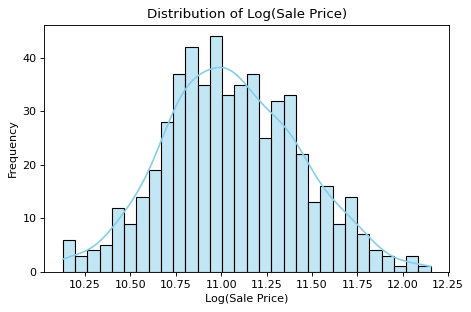

In [7]:
plt.figure(figsize=(6, 4), dpi=80)  # smaller figure
sns.histplot(df['log_sell'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Log(Sale Price)")
plt.xlabel("Log(Sale Price)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### (c) Including Both Lot and Log(Lot)

To determine the best specification for lot size, both `lot` and `log_lot` were included in the regression model.

##### Key findings:

- Model fit improved: R² = 0.687, slightly higher than the previous log model.  
- `log_lot` is significant (p < 0.001), while `lot` is not significant (p = 0.359).  
- Coefficient of `log_lot` = 0.383 → a 1% increase in lot size increases house price by ≈0.38%.  
- The large condition number (4.27 × 10⁵) indicates multicollinearity between `lot` and `log_lot`.  

**Conclusion:**  
The logarithmic specification of lot size captures the effect on house prices better than raw lot size. Therefore, the final model should include `log_lot` only and exclude the linear `lot` variable.

In [8]:
# (c) Include lot and log(lot)

df['log_lot'] = np.log(df['lot'])

X_c = df[['lot', 'log_lot', 'bdms', 'fb', 'sty', 'drv',
          'rec', 'ffin', 'ghw', 'ca', 'gar', 'reg']]

X_c = sm.add_constant(X_c)

model_c = sm.OLS(df['log_sell'], X_c).fit()
print(model_c.summary())

print("Check significance of lot and log_lot to decide which to include.")

                            OLS Regression Results                            
Dep. Variable:               log_sell   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     97.51
Date:                Thu, 26 Feb 2026   Prob (F-statistic):          6.43e-126
Time:                        07:42:45   Log-Likelihood:                 82.843
No. Observations:                 546   AIC:                            -139.7
Df Residuals:                     533   BIC:                            -83.75
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1505      0.683     10.469      0.0

#### (d) Interaction Effects

Interaction terms between `log_lot` and other predictors were included to test if the effect of lot size varies by other house characteristics.

##### Results:

- Model fit: R² = 0.695, a small improvement over the main-effects model.  
- Individually significant interactions:  
  - `loglot_drv` (driveway), p = 0.029  
  - `loglot_rec` (recreation room), p = 0.014  
- Most other interactions are not significant.

**Conclusion:**  
Interaction effects exist but are limited to specific features. Most interactions do not substantially improve the model.

In [9]:
# (d) Interaction Effects

X_d = df[['log_lot', 'bdms', 'fb', 'sty', 'drv',
          'rec', 'ffin', 'ghw', 'ca', 'gar', 'reg']].copy()

# Create interaction terms
for col in X_d.columns:
    if col != 'log_lot':
        X_d[f'loglot_{col}'] = df['log_lot'] * df[col]

X_d = sm.add_constant(X_d)

model_d = sm.OLS(df['log_sell'], X_d).fit()
print(model_d.summary())

# Count individually significant interactions
interaction_cols = [col for col in X_d.columns if 'loglot_' in col]
significant = [col for col in interaction_cols if model_d.pvalues[col] < 0.05]

print("Number of individually significant interactions:", len(significant))
print("Significant interactions:", significant)

                            OLS Regression Results                            
Dep. Variable:               log_sell   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     56.89
Date:                Thu, 26 Feb 2026   Prob (F-statistic):          2.26e-120
Time:                        07:42:47   Log-Likelihood:                 89.971
No. Observations:                 546   AIC:                            -135.9
Df Residuals:                     524   BIC:                            -41.28
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.9665      1.071      8.375      

#### (e) Joint F-Test for Interaction Terms

The joint significance of all interaction terms was tested using an F-test:

F-statistic = 0.639, p = 0.424 → fail to reject the null hypothesis

**Conclusion:**  
Overall, the interaction terms do not jointly improve the model significantly, even though a few individual interactions are meaningful.

In [10]:
# (e) Joint F-test for interaction effects

hypothesis = ' + '.join(interaction_cols) + ' = 0'
f_test = model_d.f_test(hypothesis)

print("Joint F-test results:")
print(f_test)

Joint F-test results:
<F test: F=0.6391342165534517, p=0.42438672574213115, df_denom=524, df_num=1>


#### (f) General-to-Specific Approach

A stepwise elimination of insignificant interaction terms was applied to reach a more parsimonious model.

##### Results:

- Final model retained main effects and the significant interaction `loglot_rec`.  
- Model fit: R² = 0.689, slightly higher than previous models.  
- This approach improves interpretability while retaining predictive power.

**Conclusion:**  
Simplifying the model by removing insignificant interactions allows for a clearer understanding of the relationships between predictors and house prices.

In [11]:
# (f) General-to-Specific approach

current_model = model_d
current_X = X_d.copy()

while True:
    pvals = current_model.pvalues
    interaction_pvals = pvals[interaction_cols]
    max_p = interaction_pvals.max()

    if max_p > 0.05:
        remove_var = interaction_pvals.idxmax()
        print("Removing:", remove_var)

        current_X = current_X.drop(columns=[remove_var])
        interaction_cols.remove(remove_var)

        current_model = sm.OLS(df['log_sell'], current_X).fit()
    else:
        break

print("Final Selected Model:")
print(current_model.summary())

Removing: loglot_reg
Removing: loglot_bdms
Removing: loglot_ffin
Removing: loglot_ghw
Removing: loglot_ca
Removing: loglot_gar
Removing: loglot_fb
Removing: loglot_sty
Removing: loglot_drv
Final Selected Model:
                            OLS Regression Results                            
Dep. Variable:               log_sell   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     98.59
Date:                Thu, 26 Feb 2026   Prob (F-statistic):          8.71e-127
Time:                        07:42:52   Log-Likelihood:                 84.909
No. Observations:                 546   AIC:                            -143.8
Df Residuals:                     533   BIC:                            -87.88
Df Model:                          12                                         
Covariance Type:            nonrobust                                         

#### (g) Potential Endogeneity

Some explanatory variables may be endogenous or influenced by omitted variables:

- Example: Overall condition of a house is unobserved but may correlate with variables like `ca` (central air conditioning).  
- Implication: Coefficient estimates for `ca` could be biased upwards, reflecting both air conditioning and general condition.

**Conclusion:**  
Caution is needed in interpreting coefficients causally. Recognizing potential omitted variable bias is important for accurate economic inference.

#### (h) Predictive Power Analysis

The model’s predictive ability was tested on a holdout sample:

- **Training set:** 400 observations  
- **Testing set:** 146 observations  

##### Predictions on test set:

- Mean Absolute Error (MAE) = 0.128  
- Standard deviation of log price = 0.288  
- MAE / Std Dev = 0.444  

##### Interpretation:

- The MAE of 0.128 indicates that predictions deviate from actual log prices by about 0.13 units on average.  
- Compared to the overall variation in log prices (Std Dev = 0.288), the error captures roughly 44% of the variability, meaning the model explains 56% of the variation in new data.  

**Conclusion:**  
The model demonstrates reasonable predictive accuracy and is practical for estimating house prices in applied settings.

In [12]:
# (h) Predictive Power Analysis


X_final = df[['log_lot', 'bdms', 'fb', 'sty', 'drv',
              'rec', 'ffin', 'ghw', 'ca', 'gar', 'reg']]

X_final = sm.add_constant(X_final)
y_final = df['log_sell']

# Split data
X_train = X_final.iloc[:400]
y_train = y_final.iloc[:400]

X_test = X_final.iloc[400:]
y_test = y_final.iloc[400:]

# Fit model
model_h = sm.OLS(y_train, X_train).fit()

# Predictions
y_pred = model_h.predict(X_test)

# Calculate MAE
MAE = np.mean(np.abs(y_test - y_pred))
std_log_price = np.std(y_test)

print("MAE:", MAE)
print("Standard Deviation of log price:", std_log_price)
print("MAE / Std Dev:", MAE / std_log_price)

MAE: 0.12784156874513528
Standard Deviation of log price: 0.28778168114464014
MAE / Std Dev: 0.44423108599772765


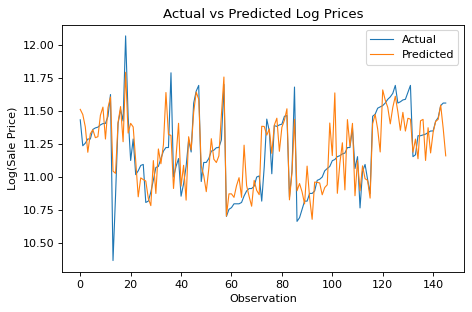

In [13]:
plt.figure(figsize=(6, 4), dpi=80)  # smaller size for GitHub
plt.plot(y_test.values, label="Actual", linewidth=1)
plt.plot(y_pred.values, label="Predicted", linewidth=1)
plt.xlabel("Observation")
plt.ylabel("Log(Sale Price)")
plt.title("Actual vs Predicted Log Prices")
plt.legend()
plt.tight_layout()  # prevent clipping
plt.show()

### Conclusion

This project analyzed the determinants of house prices using data from 546 residential properties. Linear and log-linear regression models were applied to examine the relationships between house characteristics and sale prices, test assumptions, and develop a predictive model.

#### Key Findings:

- **Linearity:** The original level model (sale price) failed the linearity test, while the log-transformed model satisfied linearity and stabilized variance.  
- **Lot Size:** Logarithm of lot size (`log_lot`) is a better predictor than raw lot size, improving model fit and interpretability.  
- **Significant Predictors:** Bedrooms, bathrooms, full bathrooms, structural style, driveway, recreation area, finished floors, garage, air conditioning, and region all significantly affect house prices.  
- **Interaction Effects:** Only specific interactions (`loglot_drv` and `loglot_rec`) were individually significant; most interaction terms were not important, and joint tests confirmed limited collective effect.  
- **Model Refinement:** Using the general-to-specific approach, a parsimonious model was selected that retained meaningful main effects and significant interaction terms, balancing simplicity and predictive power.  
- **Endogeneity Consideration:** Omitted variables such as house condition may bias coefficients (e.g., effect of air conditioning may be overestimated).  
- **Predictive Accuracy:** The final model provides reasonably accurate predictions on out-of-sample data (MAE / Std Dev = 0.444), making it useful for practical price estimation.

The log-linear regression model with selected predictors and limited interaction effects effectively explains variation in house prices and provides reliable predictive ability. Transformations, careful variable selection, and awareness of potential endogeneity are crucial for robust modeling in real estate pricing analysis.